In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [78]:
# Read in the modelling input file
model_input = pd.read_csv('../../data/output/20250415_modelling_input_v_20250415_114113.csv')
model_input.head()

,project_id,project_name,po_no,account,account_description,siteid,site,supplierid,suppliername,partnumber,...,all_priority_products,any_priority_products,match_commodity,match_supplier,new_commodity_description,new_commodity_group,all_accounts_2008_classified,all_2008_accounts_converted,multiple_commodities,freight_per_invoice
0,2311123624,Rick Sidor Residence,47568,2008,Received Not Yet Invoiced,DIT,Diverzify Itasca,890,All Surfaces,1000008205,...,True,True,Commodity Found,No supplier found,LVT,1VNL,True,True,False,54.55
1,230485284,Epic Delphi Conference Room Refresh,40635,2008,Received Not Yet Invoiced,DIT,Diverzify Itasca,108164,"Mannington Mills, Inc.",1000006036,...,True,True,Commodity Found,Supplier registered,LVT,1VNL,True,True,False,49.55
2,2310119387,Round Barn Manor,49453,2008,Received Not Yet Invoiced,DIT,Diverzify Itasca,890,All Surfaces,1000008746,...,True,True,Commodity Found,No supplier found,LVP,1VNL,True,True,False,159.86
3,2401130627,Hotel Zachary - Tenant 9 Elevator F,52075,2008,Received Not Yet Invoiced,DIT,Diverzify Itasca,103423,"Shaw Industries, Inc.",1000009308,...,True,True,Commodity Found,Supplier registered,LVP,1VNL,True,True,False,86.14
4,2402136755,Arrow Electronics,64012,2008,Received Not Yet Invoiced,DIT,Diverzify Itasca,103423,"Shaw Industries, Inc.",1000012638,...,True,True,Commodity Found,Supplier registered,LVT,1VNL,True,True,False,88.50


In [79]:
# Read the CSV file with modelled results
model_output = pd.read_csv('../../app/downloads/freight_dual_results_20250415_114236.csv')
model_output.head(2)

,project_id,project_name,po_no,account,account_description,siteid,site,supplierid,suppliername,partnumber,...,match_supplier,est_estimated_area_cost,est_estimated_cwt_cost,est_freight_class_area,est_freight_class_lbs,est_lbs,est_rate_area,est_rate_cwt,est_sqyd,est_uom
0,2311123624,Rick Sidor Residence,47568,2008,Received Not Yet Invoiced,DIT,Diverzify Itasca,890,All Surfaces,1000008205,...,No supplier found,Not applicable,204.88,NaN,1M,1172.06,Not applicable,17.48,112.65,SQFT
1,230485284,Epic Delphi Conference Room Refresh,40635,2008,Received Not Yet Invoiced,DIT,Diverzify Itasca,108164,"Mannington Mills, Inc.",1000006036,...,Supplier registered,Not applicable,58.82,NaN,L5C,208.08,Not applicable,28.27,20.00,SQFT


In [81]:
# Load your DataFrame (replace this with your actual loading logic)

# --- Clean numeric fields that may contain errors or text ---
model_output['est_estimated_area_cost'] = pd.to_numeric(
    model_output['est_estimated_area_cost'].astype(str).str.extract(r'([-]?[0-9]*\.?[0-9]+)')[0],
    errors='coerce'
)

model_output['est_estimated_cwt_cost'] = pd.to_numeric(
    model_output['est_estimated_cwt_cost'].astype(str).str.extract(r'([-]?[0-9]*\.?[0-9]+)')[0],
    errors='coerce'
)

# --- Group by invoice_id and aggregate ---
model_output_freight = model_output.groupby(['siteid', 'invoice_id']).agg(
    #total_quantity=('quantity', 'sum'),
    total_estimated_area_cost=('est_estimated_area_cost', 'sum'),
    total_estimated_cwt_cost=('est_estimated_cwt_cost', 'sum'),
    total_est_lbs=('est_lbs', 'sum'),
    total_est_sqyd=('est_sqyd', 'sum'),
    unique_commodity_group_output=('est_commodity_group', lambda x: x.dropna().unique().tolist()),
    unique_commodity_description_output=('new_commodity_description', lambda x: x.dropna().unique().tolist())
).reset_index()

# View results
model_output_freight.head()

,siteid,invoice_id,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,unique_commodity_group_output,unique_commodity_description_output
0,DIT,443670,0.0,204.88,1172.06,112.65,[1VNL],[LVT]
1,DIT,454017,0.0,58.82,208.08,20.00,[1VNL],[LVT]
2,DIT,457800,0.0,485.12,3495.08,348.29,[1VNL],[LVP]
3,DIT,466275,0.0,37.83,133.80,13.33,[1VNL],[LVP]
4,DIT,559703,0.0,27.88,98.61,9.48,[1VNL],[LVT]


In [82]:
# Replace 'desired_invoice_id' with the actual invoice_id you want to filter
desired_invoice_id = 1206101
filtered_model_output = model_output_freight[model_output_freight['invoice_id'] == desired_invoice_id]

# Display the filtered result
filtered_model_output

,siteid,invoice_id,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,unique_commodity_group_output,unique_commodity_description_output
74,DIT,1206101,0.0,4212.33,31271.95,8423.42,[1CBL],[Carpet Roll]


In [83]:
#Get the unique commodity descriptions for each invoice_id amd the freight price from the modelled input
model_input_freight = model_input.groupby(['siteid','invoice_id']).agg(
    freight_price=('freight_per_invoice', 'first'),
    unique_commodity_group_input=('new_commodity_group', lambda x: x.dropna().unique().tolist()),
    unique_commodity_description_input=('new_commodity_description', lambda x: x.dropna().unique().tolist())
).reset_index()
model_input_freight

,siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input
0,DIT,443670,54.55,[1VNL],[LVT]
1,DIT,454017,49.55,[1VNL],[LVT]
2,DIT,457800,159.86,[1VNL],[LVP]
3,DIT,466275,86.14,[1VNL],[LVP]
4,DIT,559703,88.50,[1VNL],[LVT]
...,...,...,...,...,...
2035,SPW,1743395,8.39,[1VNL],[VCT]
2036,SPW,1743617,315.87,[1VNL],[LVT]
2037,SPW,1745209,155.59,[1VNL],[VCT]
2038,SPW,1745853,5.99,[1VNL],[VCT]


In [84]:
# Merge the two summaries on invoice_id
merged_summary = pd.merge(model_input_freight, model_output_freight, on=['siteid','invoice_id'], how='left')
# Ensure all numerical columns in merged_summary are floats
numerical_columns = ['freight_price', 'total_estimated_area_cost', 'total_estimated_cwt_cost']
merged_summary[numerical_columns] = merged_summary[numerical_columns].apply(pd.to_numeric, errors='coerce')


# Display the first few rows of the updated merged summary
merged_summary.sort_values(by='freight_price',ascending=False).head()

,siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,unique_commodity_group_output,unique_commodity_description_output
979,SPT,601562,10836.22,[1VNL],[VCT],0.0,808.62,7155.89,559.93,[1VNL],[VCT]
774,SPN,1294588,9749.59,[1VNL],"[LVP, VCT]",0.0,5528.99,131329.92,10693.98,[1VNL],"[LVP, VCT]"
599,SPN,723864,8497.03,[1CBL],[Carpet Roll],483.7,617.15,5988.52,1613.07,[1CBL],[Carpet Roll]
1971,SPW,1643009,8198.64,[1VNL],[LVT],0.0,2954.70,31366.22,3014.82,[1VNL],[LVT]
1743,SPW,1027287,7333.09,[1VNL],[LVT],0.0,6676.23,70872.97,6812.09,[1VNL],[LVT]


In [85]:
# Step 3: Apply conditional logic
merged_summary['total_cost'] = merged_summary.apply(
    lambda row: row['total_estimated_cwt_cost'] if '1VNL' in row['unique_commodity_group_input'] else (
        row['total_estimated_area_cost'] if '1CBL' in row['unique_commodity_group_input'] else 0
    ),
    axis=1
)
merged_summary.sort_values(by='freight_price',ascending=False).head()

,siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,unique_commodity_group_output,unique_commodity_description_output,total_cost
979,SPT,601562,10836.22,[1VNL],[VCT],0.0,808.62,7155.89,559.93,[1VNL],[VCT],808.62
774,SPN,1294588,9749.59,[1VNL],"[LVP, VCT]",0.0,5528.99,131329.92,10693.98,[1VNL],"[LVP, VCT]",5528.99
599,SPN,723864,8497.03,[1CBL],[Carpet Roll],483.7,617.15,5988.52,1613.07,[1CBL],[Carpet Roll],483.70
1971,SPW,1643009,8198.64,[1VNL],[LVT],0.0,2954.70,31366.22,3014.82,[1VNL],[LVT],2954.70
1743,SPW,1027287,7333.09,[1VNL],[LVT],0.0,6676.23,70872.97,6812.09,[1VNL],[LVT],6676.23


In [86]:
# Step 3: Apply conditional logic
merged_summary['total_quantity'] = merged_summary.apply(
    lambda row: row['total_est_lbs'] if '1VNL' in row['unique_commodity_group_input'] else (
        row['total_est_sqyd'] if '1CBL' in row['unique_commodity_group_input'] else 0
    ),
    axis=1
)
merged_summary.sort_values(by='freight_price',ascending=False).head()

,siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,unique_commodity_group_output,unique_commodity_description_output,total_cost,total_quantity
979,SPT,601562,10836.22,[1VNL],[VCT],0.0,808.62,7155.89,559.93,[1VNL],[VCT],808.62,7155.89
774,SPN,1294588,9749.59,[1VNL],"[LVP, VCT]",0.0,5528.99,131329.92,10693.98,[1VNL],"[LVP, VCT]",5528.99,131329.92
599,SPN,723864,8497.03,[1CBL],[Carpet Roll],483.7,617.15,5988.52,1613.07,[1CBL],[Carpet Roll],483.70,1613.07
1971,SPW,1643009,8198.64,[1VNL],[LVT],0.0,2954.70,31366.22,3014.82,[1VNL],[LVT],2954.70,31366.22
1743,SPW,1027287,7333.09,[1VNL],[LVT],0.0,6676.23,70872.97,6812.09,[1VNL],[LVT],6676.23,70872.97


In [87]:
merged_summary['UOM'] = merged_summary['unique_commodity_group_input'].apply(
    lambda x: 'LBS' if '1VNL' in x else ('SQYD' if '1CBL' in x else None)
)
merged_summary.head()

,siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,unique_commodity_group_output,unique_commodity_description_output,total_cost,total_quantity,UOM
0,DIT,443670,54.55,[1VNL],[LVT],0.0,204.88,1172.06,112.65,[1VNL],[LVT],204.88,1172.06,LBS
1,DIT,454017,49.55,[1VNL],[LVT],0.0,58.82,208.08,20.00,[1VNL],[LVT],58.82,208.08,LBS
2,DIT,457800,159.86,[1VNL],[LVP],0.0,485.12,3495.08,348.29,[1VNL],[LVP],485.12,3495.08,LBS
3,DIT,466275,86.14,[1VNL],[LVP],0.0,37.83,133.80,13.33,[1VNL],[LVP],37.83,133.80,LBS
4,DIT,559703,88.50,[1VNL],[LVT],0.0,27.88,98.61,9.48,[1VNL],[LVT],27.88,98.61,LBS


In [88]:
merged_summary['freight_ratio'] = (merged_summary['total_cost'] / merged_summary['freight_price']).round(2)
merged_summary.sort_values(by='freight_price',ascending=False).head(10)

,siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,unique_commodity_group_output,unique_commodity_description_output,total_cost,total_quantity,UOM,freight_ratio
979,SPT,601562,10836.22,[1VNL],[VCT],0.0,808.62,7155.89,559.93,[1VNL],[VCT],808.62,7155.89,LBS,0.07
774,SPN,1294588,9749.59,[1VNL],"[LVP, VCT]",0.0,5528.99,131329.92,10693.98,[1VNL],"[LVP, VCT]",5528.99,131329.92,LBS,0.57
599,SPN,723864,8497.03,[1CBL],[Carpet Roll],483.7,617.15,5988.52,1613.07,[1CBL],[Carpet Roll],483.70,1613.07,SQYD,0.06
1971,SPW,1643009,8198.64,[1VNL],[LVT],0.0,2954.70,31366.22,3014.82,[1VNL],[LVT],2954.70,31366.22,LBS,0.36
1743,SPW,1027287,7333.09,[1VNL],[LVT],0.0,6676.23,70872.97,6812.09,[1VNL],[LVT],6676.23,70872.97,LBS,0.91
1968,SPW,1642699,7275.44,[1VNL],[LVT],0.0,2505.03,26592.62,2556.00,[1VNL],[LVT],2505.03,26592.62,LBS,0.34
13,DIT,634257,6750.00,[1VNL],[LVT],0.0,4685.42,65347.52,6281.00,[1VNL],[LVT],4685.42,65347.52,LBS,0.69
1861,SPW,1148538,6652.92,[1VNL],[LVT],0.0,3664.24,38898.48,3738.80,[1VNL],[LVT],3664.24,38898.48,LBS,0.55
2000,SPW,1688795,6470.47,[1VNL],[LVT],0.0,5010.05,53185.25,5112.00,[1VNL],[LVT],5010.05,53185.25,LBS,0.77
792,SPN,1647513,6177.60,[1VNL],[LVP],0.0,1318.12,31309.20,3120.00,[1VNL],[LVP],1318.12,31309.20,LBS,0.21


In [89]:

def analyze_freight_outliers(df: pd.DataFrame, ratio_col: str = "freight_ratio", plot: bool = True) -> pd.DataFrame:
    """
    Analyzes freight ratio outliers using the IQR method and optionally plots the distribution.

    Parameters:
        df (pd.DataFrame): Input DataFrame containing the freight ratio column.
        ratio_col (str): Name of the column containing the freight ratio.
        plot (bool): Whether to display the histogram plot.

    Returns:
        pd.DataFrame: Summary table with outlier classification counts and statistics.

    Adds 'savings' and 'Action' columns to classify freight performance.

    Parameters:
        df (pd.DataFrame): Input DataFrame with freight ratio column.
        ratio_col (str): Column name for the freight ratio.

    Returns:
        pd.DataFrame: Updated DataFrame with 'savings' and 'Action' columns.
    """
    
    # Step 2: Compute IQR bounds
    q1 = df[ratio_col].quantile(0.25)
    q3 = df[ratio_col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"Dynamic Outlier Thresholds:\nLower: {lower_bound:.2f} | Upper: {upper_bound:.2f}")

    # Step 3: Tag outliers
    df["outlier_flag"] = df[ratio_col].apply(
        lambda x: "Lower" if x < lower_bound else ("Upper" if x > upper_bound else "Normal")
    )
    df["savings"] = df[ratio_col].apply(lambda x: "Good" if x > 1 else "Bad")
    df["Action"] = df[ratio_col].apply(lambda x: "Audit" if x > 2 or x < 0.5 else "Analyse")

    # Step 5: Visualize distribution
    if plot:
        plt.figure(figsize=(12, 6))
        sns.histplot(df[ratio_col], bins=100, kde=True)
        plt.axvline(x=1, color="red", linestyle="--", label="Break-Even (1.0)")
        plt.axvline(x=lower_bound, color="orange", linestyle="--", label="Lower Bound")
        plt.axvline(x=upper_bound, color="orange", linestyle="--", label="Upper Bound")
        plt.title("Freight Ratio Distribution")
        plt.xlabel("Freight Ratio (Historical / 3PL)")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True)
        plt.show()

    # Step 6: Summary
    summary = df.groupby("outlier_flag").agg(
        count=(ratio_col, "count"),
        mean_ratio=(ratio_col, "mean"),
        median_ratio=(ratio_col, "median")
    ).reset_index()

    summary.columns = ["Outlier Type", "Count", "Mean Ratio", "Median Ratio"]
    return summary


Dynamic Outlier Thresholds:
Lower: -1.25 | Upper: 3.15


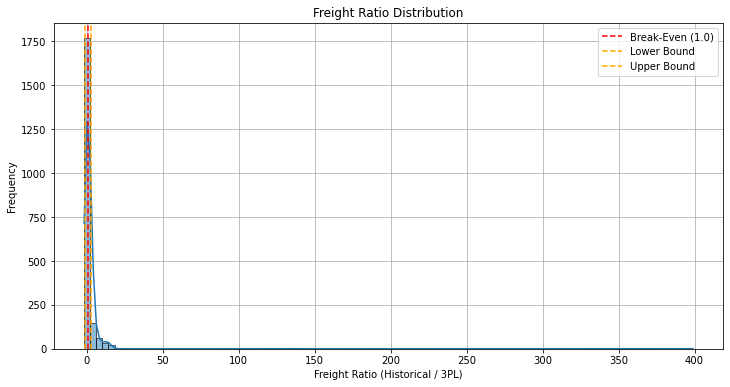

  Outlier Type  Count  Mean Ratio  Median Ratio
0        Lower      1   -1.600000         -1.60
1       Normal   1827    0.874521          0.76
2        Upper    212   10.982783          6.84


In [90]:
# call the function to analyze the freight outliers
summary_table = analyze_freight_outliers(merged_summary)
print(summary_table)


In [91]:
merged_summary.head(2)

,siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,unique_commodity_group_output,unique_commodity_description_output,total_cost,total_quantity,UOM,freight_ratio,outlier_flag,savings,Action
0,DIT,443670,54.55,[1VNL],[LVT],0.0,204.88,1172.06,112.65,[1VNL],[LVT],204.88,1172.06,LBS,3.76,Upper,Good,Audit
1,DIT,454017,49.55,[1VNL],[LVT],0.0,58.82,208.08,20.00,[1VNL],[LVT],58.82,208.08,LBS,1.19,Normal,Good,Analyse


In [92]:
# Classify as FTL or LTL based on the criteria
# Assume that a FTL for CBL is 45 rolls i.e 1 roll is = 100 SYD
# Assume that a FTL for VNL is more than 15000 lbs 
def classify_shipment(row):
    uom = row['UOM']
    qty = row['total_quantity']
    
    if uom == 'LBS':
        return 'FTL' if qty >= 15000 else 'LTL'
    elif uom == 'SQYD':
        rolls = qty / 100
        return 'FTL' if rolls >= 45 else 'LTL'
    else:
        return 'Unknown'  # fallback for unexpected units



In [93]:
merged_summary['shipment_type'] = merged_summary.apply(classify_shipment, axis=1)
merged_summary.head()

,siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,unique_commodity_group_output,unique_commodity_description_output,total_cost,total_quantity,UOM,freight_ratio,outlier_flag,savings,Action,shipment_type
0,DIT,443670,54.55,[1VNL],[LVT],0.0,204.88,1172.06,112.65,[1VNL],[LVT],204.88,1172.06,LBS,3.76,Upper,Good,Audit,LTL
1,DIT,454017,49.55,[1VNL],[LVT],0.0,58.82,208.08,20.00,[1VNL],[LVT],58.82,208.08,LBS,1.19,Normal,Good,Analyse,LTL
2,DIT,457800,159.86,[1VNL],[LVP],0.0,485.12,3495.08,348.29,[1VNL],[LVP],485.12,3495.08,LBS,3.03,Normal,Good,Audit,LTL
3,DIT,466275,86.14,[1VNL],[LVP],0.0,37.83,133.80,13.33,[1VNL],[LVP],37.83,133.80,LBS,0.44,Normal,Bad,Audit,LTL
4,DIT,559703,88.50,[1VNL],[LVT],0.0,27.88,98.61,9.48,[1VNL],[LVT],27.88,98.61,LBS,0.32,Normal,Bad,Audit,LTL


In [ ]:
merged_summary.to_csv('../../data/output/all_data_with_quantity2.csv', index=False)
# --- Plotting the results ---
merged_summary.head(20)

,siteid,invoice_id,freight_price,unique_commodity_group_input,unique_commodity_description_input,total_estimated_area_cost,total_estimated_cwt_cost,total_est_lbs,total_est_sqyd,unique_commodity_group_output,unique_commodity_description_output,total_cost,total_quantity,UOM,freight_ratio,savings,Action,outlier_flag
0,DIT,443670,54.55,[1VNL],[LVT],0.00,204.88,1172.06,112.65,[1VNL],[LVT],204.88,1172.06,LBS,3.76,Good,Audit,Upper
1,DIT,454017,49.55,[1VNL],[LVT],0.00,58.82,208.08,20.00,[1VNL],[LVT],58.82,208.08,LBS,1.19,Good,Analyse,Normal
2,DIT,457800,159.86,[1VNL],[LVP],0.00,485.12,3495.08,348.29,[1VNL],[LVP],485.12,3495.08,LBS,3.03,Good,Audit,Normal
3,DIT,466275,86.14,[1VNL],[LVP],0.00,37.83,133.80,13.33,[1VNL],[LVP],37.83,133.80,LBS,0.44,Bad,Audit,Normal
4,DIT,559703,88.50,[1VNL],[LVT],0.00,27.88,98.61,9.48,[1VNL],[LVT],27.88,98.61,LBS,0.32,Bad,Audit,Normal
5,DIT,559715,331.28,[1VNL],[LVT],0.00,301.11,2169.35,208.51,[1VNL],[LVT],301.11,2169.35,LBS,0.91,Bad,Analyse,Normal
6,DIT,562903,150.00,[1VNL],[LVP],0.00,30.26,107.04,10.67,[1VNL],[LVP],30.26,107.04,LBS,0.20,Bad,Audit,Normal
7,DIT,584653,34.85,[1CBL],[Carpet Roll],14.04,63.13,118.80,32.00,[1CBL],[Carpet Roll],14.04,32.00,SQYD,0.40,Bad,Audit,Normal
8,DIT,592040,1043.00,[1VNL],[VCT],0.00,604.21,4353.08,340.62,[1VNL],[VCT],604.21,4353.08,LBS,0.58,Bad,Analyse,Normal
9,DIT,607962,88.50,[1CBL],[Carpet Roll],21.93,98.64,185.62,50.00,[1CBL],[Carpet Roll],21.93,50.00,SQYD,0.25,Bad,Audit,Normal
